In [1]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.utils import to_categorical

In [2]:
import pandas as pd
import pickle

#data for standars ML models
data = pickle.load(open('data_img_df.pickle',mode='rb'))

In [4]:
data.sample(3)

,filepath,category,image_flatten,arr_gray_resized,color_img,color_img_resized
7205,/content/drive/MyDrive/eobuwie/polbuty/01_0000...,polbuty,"[255, 255, 255, 255, 255, 254, 254, 254, 254, ...","[[255, 255, 255, 255, 255, 254, 254, 254, 254,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1859,/content/drive/MyDrive/eobuwie/klapki-i-sandal...,klapki-i-sandaly,"[255, 255, 255, 255, 255, 254, 254, 254, 254, ...","[[255, 255, 255, 255, 255, 254, 254, 254, 254,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
9598,/content/drive/MyDrive/eobuwie/sportowe/000020...,sportowe,"[255, 255, 255, 255, 255, 254, 254, 254, 254, ...","[[255, 255, 255, 255, 255, 254, 254, 254, 254,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [5]:
data = data.dropna()

In [6]:
cnn_vector  = data['color_img_resized'].to_numpy()/255.

In [7]:
arr = [cnn_vector[0]]
for i in range(1,cnn_vector.shape[0]):
  arr = np.vstack((arr,[cnn_vector[i]]))
print(arr.shape)

(9999, 100, 100, 3)


In [9]:
cnn_arr = [arr,data['category'].to_numpy()]

In [10]:
import pickle
pickle.dump(cnn_arr,open('data_arr_img.pickle',mode='wb'))

In [16]:
cnn_arr[0]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]

In [15]:
cnn_arr[1]

array(['klapki-i-sandaly', 'klapki-i-sandaly', 'klapki-i-sandaly', ...,
       'sportowe', 'sportowe', 'sportowe'], dtype=object)

In [17]:
import pickle
data = pickle.load(open('data_arr_img.pickle',mode='rb'))

In [18]:
import pandas as pd
import numpy as np
X = data[0]
y = data[1]

In [19]:
y_series = pd.DataFrame(y)

dict_names = {'klapki-i-sandaly':1, 'polbuty':2, 'sportowe':3, 'kozaki-i-inne':4}

y_series['category_num'] = y_series.iloc[:,0].apply(lambda row: dict_names[row])

y = y_series['category_num'].to_numpy()

In [20]:
X.shape

(9999, 100, 100, 3)

In [21]:
y.shape

(9999,)

In [22]:
y

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

# Train the model and evaluation of the CNN model

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [32]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [37]:
y_test_ohe[0]

array([0., 0., 0., 1., 0.], dtype=float32)

In [42]:
np.unique(y_test)

array([1, 2, 3, 4], dtype=int64)

In [43]:
model = Sequential()

model.add(Conv2D(64, (3, 3),
          activation='relu',
          input_shape=(100, 100,3),
          kernel_initializer='he_uniform',
          padding='same'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32, (3, 3),
          activation='relu',
          kernel_initializer='he_uniform',
          padding='same'))
model.add(MaxPool2D((2,2), strides=(1,1)))

model.add(Flatten())
model.add(Dense(128,
          activation='relu'))
model.add(Dense(5,
          activation='softmax'))

In [44]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [45]:
history = model.fit(X_train, y_train_ohe,
                    epochs = 10,
                    batch_size = 128,
                    validation_data=(X_test, y_test_ohe),
                    verbose = 1)

Epoch 1/10
63/63 [==============================] - 49s 767ms/step - loss: 8.3340 - accuracy: 0.6106 - val_loss: 0.5026 - val_accuracy: 0.8045
Epoch 2/10
63/63 [==============================] - 49s 778ms/step - loss: 0.4780 - accuracy: 0.8024 - val_loss: 0.4596 - val_accuracy: 0.8135
Epoch 3/10
63/63 [==============================] - 49s 773ms/step - loss: 0.3881 - accuracy: 0.8354 - val_loss: 0.3721 - val_accuracy: 0.8405
Epoch 4/10
63/63 [==============================] - 51s 804ms/step - loss: 0.3372 - accuracy: 0.8580 - val_loss: 0.4153 - val_accuracy: 0.8260
Epoch 5/10
63/63 [==============================] - 51s 804ms/step - loss: 0.3705 - accuracy: 0.8431 - val_loss: 0.4171 - val_accuracy: 0.8305
Epoch 6/10
63/63 [==============================] - 49s 781ms/step - loss: 0.2951 - accuracy: 0.8769 - val_loss: 0.4006 - val_accuracy: 0.8400
Epoch 7/10
63/63 [==============================] - 51s 814ms/step - loss: 0.2607 - accuracy: 0.8914 - val_loss: 0.4164 - val_accuracy: 0.8420

In [46]:
import matplotlib.pyplot as plt

def plot_history(history):
 #Plot the Loss Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['loss'],'r',linewidth=3.0)
 plt.plot(history.history['val_loss'],'b',linewidth=3.0)
 plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Loss',fontsize=16)
 plt.title('Loss Curves',fontsize=16)
 #Plot the Accuracy Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
 plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
 plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Accuracy',fontsize=16)
 plt.title('Accuracy Curves',fontsize=16)

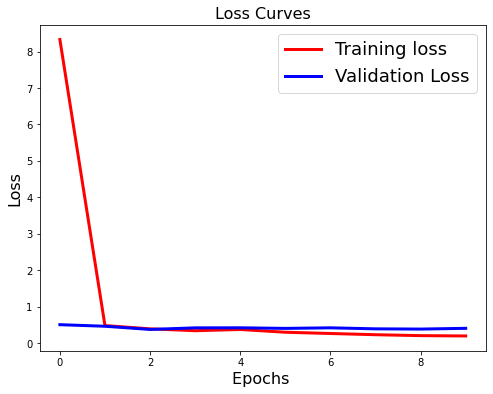

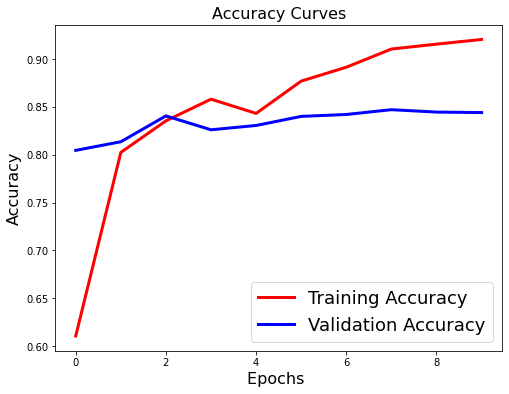

In [47]:
plot_history(history)

In [48]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_pred, y_test))

63/63 [==============================] - 5s 43ms/step
              precision    recall  f1-score   support

           1       0.95      0.95      0.95       497
           2       0.83      0.71      0.76       591
           3       0.63      0.80      0.70       392
           4       0.97      0.93      0.95       520

    accuracy                           0.84      2000
   macro avg       0.84      0.85      0.84      2000
weighted avg       0.86      0.84      0.85      2000



# Add regularization, add more layers

In [69]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import regularizers

In [70]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,stratify=y_train)

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

In [74]:
model = Sequential()

model.add(Conv2D(64, (3, 3),
          activation='relu',
          input_shape=(100, 100,3),
          kernel_initializer='he_uniform',
          kernel_regularizer=regularizers.l2(l=0.01),
          padding='same'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32, (3, 3),
          activation='relu',
          kernel_initializer='he_uniform',
          kernel_regularizer=regularizers.l2(l=0.01),
          padding='same'))
model.add(MaxPool2D((2,2), strides=(1,1)))

model.add(Conv2D(32, (3, 3),
          activation='relu',
          kernel_initializer='he_uniform',
          kernel_regularizer=regularizers.l2(l=0.001),
          padding='same'))
model.add(MaxPool2D((2,2), strides=(1,1)))

model.add(Conv2D(16, (3, 3),
          activation='relu',
          kernel_initializer='he_uniform',
          kernel_regularizer=regularizers.l2(l=0.01),
          padding='same'))
model.add(MaxPool2D((2,2), strides=(1,1)))


model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128,
          activation='relu'))
model.add(Dense(5,
          activation='softmax'))

optimizer = keras.optimizers.Adam(0.0001)

model.compile(optimizer= optimizer,
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(X_train, y_train_ohe,
                    epochs = 15,
                    batch_size = 128,
                    validation_data=(X_val, y_val_ohe),
                    verbose = 1)

Epoch 1/15
50/50 [==============================] - 75s 1s/step - loss: 3.2347 - accuracy: 0.5915 - val_loss: 2.8106 - val_accuracy: 0.7663
Epoch 2/15
50/50 [==============================] - 78s 2s/step - loss: 2.7180 - accuracy: 0.7825 - val_loss: 2.6535 - val_accuracy: 0.7931
Epoch 3/15
50/50 [==============================] - 82s 2s/step - loss: 2.5772 - accuracy: 0.8150 - val_loss: 2.5392 - val_accuracy: 0.8188
Epoch 4/15
50/50 [==============================] - 75s 1s/step - loss: 2.4680 - accuracy: 0.8293 - val_loss: 2.4839 - val_accuracy: 0.8188
Epoch 5/15
50/50 [==============================] - 88s 2s/step - loss: 2.3840 - accuracy: 0.8484 - val_loss: 2.3887 - val_accuracy: 0.8269
Epoch 6/15
50/50 [==============================] - 90s 2s/step - loss: 2.3069 - accuracy: 0.8547 - val_loss: 2.3351 - val_accuracy: 0.8356
Epoch 7/15
50/50 [==============================] - 88s 2s/step - loss: 2.2264 - accuracy: 0.8650 - val_loss: 2.3367 - val_accuracy: 0.8106
Epoch 8/15
50/50 [==

In [75]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_pred, y_test))

63/63 [==============================] - 3s 47ms/step
              precision    recall  f1-score   support

           1       0.93      0.97      0.95       481
           2       0.85      0.71      0.77       600
           3       0.67      0.79      0.73       428
           4       0.93      0.95      0.94       491

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [76]:
model.save("my_model2.h5", include_optimizer=True)

# Batch normalization and dropout

In [49]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [50]:
model = Sequential()

model.add(Conv2D(64, (3, 3),
          activation='relu',
          input_shape=(100, 100,3),
          kernel_initializer='he_uniform',
          padding='same'))

model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3),
          activation='relu',
          kernel_initializer='he_uniform',

          padding='same'))

model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=(1,1)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),
          activation='relu',
          kernel_initializer='he_uniform',

          padding='same'))

model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128,
          activation='relu'))
model.add(Dense(5,
          activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(X_train, y_train_ohe,
                    epochs = 10,
                    batch_size = 128,
                    validation_data=(X_test, y_test_ohe),
                    verbose = 1)

Epoch 1/10
63/63 [==============================] - 103s 2s/step - loss: 3.8549 - accuracy: 0.6478 - val_loss: 8.9936 - val_accuracy: 0.2505
Epoch 2/10
63/63 [==============================] - 110s 2s/step - loss: 0.4919 - accuracy: 0.7946 - val_loss: 1.1616 - val_accuracy: 0.5340
Epoch 3/10
63/63 [==============================] - 109s 2s/step - loss: 0.4288 - accuracy: 0.8204 - val_loss: 16.4762 - val_accuracy: 0.4015
Epoch 4/10
63/63 [==============================] - 109s 2s/step - loss: 0.3618 - accuracy: 0.8527 - val_loss: 22.4347 - val_accuracy: 0.3710
Epoch 5/10
63/63 [==============================] - 111s 2s/step - loss: 0.3434 - accuracy: 0.8601 - val_loss: 18.1170 - val_accuracy: 0.4110
Epoch 6/10
63/63 [==============================] - 123s 2s/step - loss: 0.3338 - accuracy: 0.8604 - val_loss: 9.0684 - val_accuracy: 0.5330
Epoch 7/10
63/63 [==============================] - 136s 2s/step - loss: 0.2842 - accuracy: 0.8812 - val_loss: 5.6369 - val_accuracy: 0.5725
Epoch 8/10

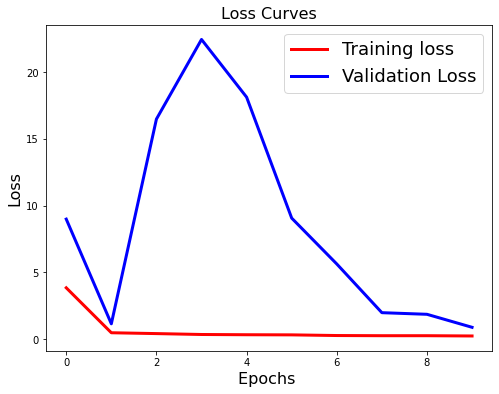

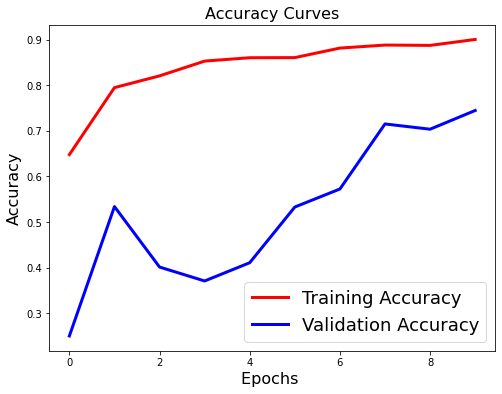

In [51]:
plot_history(history)

## Transfer learning 

In [52]:
!pip install ipynb

In [53]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,stratify=y_train)

In [54]:
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

In [55]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import BatchNormalization, Dropout

In [56]:
model_trans = Xception(input_shape=(100, 100, 3),
                        include_top=False,
                        weights="imagenet",
                        input_tensor=None,
                        pooling=None,
                        classes=1000)

model = Sequential()
model.add(model_trans)

model.add(Flatten())
model.add(Dense(128,
          activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(5,
          activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])



83683744/83683744 [==============================] - 49s 1us/step


In [57]:
history = model.fit(X_train, y_train_ohe,
                    epochs = 10,
                    batch_size = 128,
                    validation_data=(X_val, y_val_ohe),
                    verbose = 1)

Epoch 1/10
50/50 [==============================] - 496s 10s/step - loss: 1.2316 - accuracy: 0.5087 - val_loss: 1.1475 - val_accuracy: 0.6281
Epoch 2/10
50/50 [==============================] - 536s 11s/step - loss: 0.5353 - accuracy: 0.7990 - val_loss: 1.0500 - val_accuracy: 0.7269
Epoch 3/10
50/50 [==============================] - 542s 11s/step - loss: 0.2729 - accuracy: 0.8961 - val_loss: 0.8709 - val_accuracy: 0.7525
Epoch 4/10
50/50 [==============================] - 560s 11s/step - loss: 0.2087 - accuracy: 0.9222 - val_loss: 0.4364 - val_accuracy: 0.8888
Epoch 5/10
50/50 [==============================] - 563s 11s/step - loss: 0.1446 - accuracy: 0.9441 - val_loss: 0.3292 - val_accuracy: 0.8919
Epoch 6/10
50/50 [==============================] - 551s 11s/step - loss: 0.1177 - accuracy: 0.9573 - val_loss: 0.3752 - val_accuracy: 0.8819
Epoch 7/10
50/50 [==============================] - 512s 10s/step - loss: 0.0866 - accuracy: 0.9709 - val_loss: 0.4287 - val_accuracy: 0.8869
Epoch 

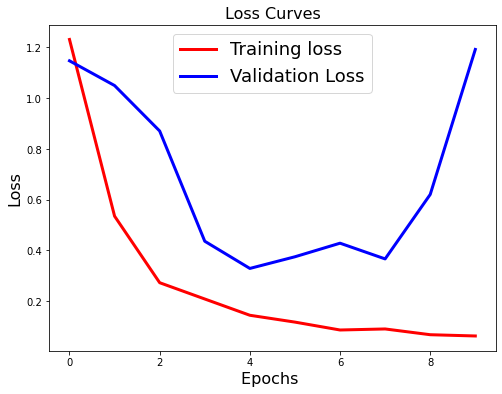

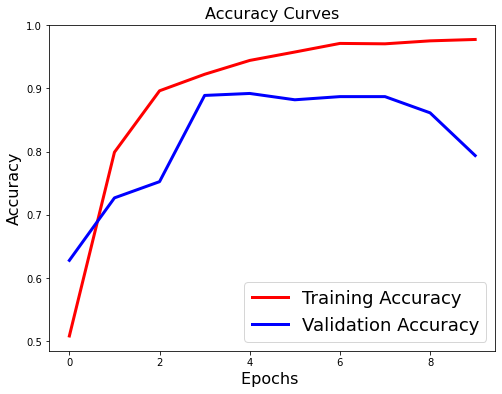

In [58]:
plot_history(history)

In [59]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_pred, y_test))

63/63 [==============================] - 20s 315ms/step
              precision    recall  f1-score   support

           1       1.00      0.78      0.88       638
           2       0.78      0.67      0.72       582
           3       0.41      0.88      0.56       234
           4       0.97      0.89      0.93       546

    accuracy                           0.79      2000
   macro avg       0.79      0.80      0.77      2000
weighted avg       0.86      0.79      0.81      2000



# Transfer learning - change learning rate, add regularization

In [60]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import regularizers

In [65]:
model_trans = Xception(input_shape=(100, 100, 3),
                        include_top=False,
                        weights="imagenet",
                        input_tensor=None,
                        pooling=None,
                        classes=1000)

model = Sequential()
model.add(model_trans)

model.add(Conv2D(32, (3, 3),
          activation='relu',
          kernel_regularizer=regularizers.l2(l=0.01),
          padding='same'))

model.add(MaxPool2D((2,2), strides=(1,1)))

model.add(Flatten())
model.add(Dense(128,
          activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5,
          activation='softmax'))

optimizer = keras.optimizers.Adam(0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(X_train, y_train_ohe,
                    epochs = 15,
                    batch_size = 128,
                    validation_data=(X_val, y_val_ohe),
                    verbose = 1)

Epoch 1/15
50/50 [==============================] - 464s 9s/step - loss: 1.4683 - accuracy: 0.6254 - val_loss: 1.5470 - val_accuracy: 0.6300
Epoch 2/15
50/50 [==============================] - 500s 10s/step - loss: 0.8547 - accuracy: 0.8709 - val_loss: 1.0601 - val_accuracy: 0.7581
Epoch 3/15
50/50 [==============================] - 532s 11s/step - loss: 0.6341 - accuracy: 0.9308 - val_loss: 0.8568 - val_accuracy: 0.8313
Epoch 4/15
50/50 [==============================] - 503s 10s/step - loss: 0.4853 - accuracy: 0.9641 - val_loss: 0.8184 - val_accuracy: 0.8413
Epoch 5/15
50/50 [==============================] - 483s 10s/step - loss: 0.3961 - accuracy: 0.9748 - val_loss: 0.7150 - val_accuracy: 0.8700
Epoch 6/15
50/50 [==============================] - 488s 10s/step - loss: 0.3248 - accuracy: 0.9794 - val_loss: 0.7486 - val_accuracy: 0.8681
Epoch 7/15
50/50 [==============================] - 487s 10s/step - loss: 0.2719 - accuracy: 0.9825 - val_loss: 0.7588 - val_accuracy: 0.8650
Epoch 8

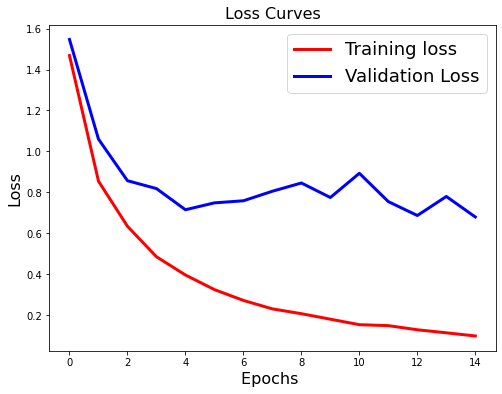

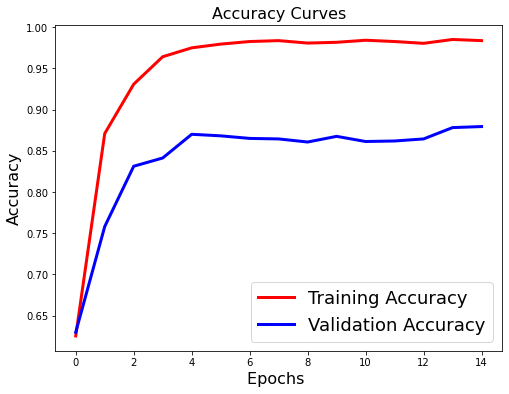

In [68]:
plot_history(history)

In [67]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_pred, y_test))

63/63 [==============================] - 17s 258ms/step
              precision    recall  f1-score   support

           1       0.97      0.96      0.96       502
           2       0.79      0.84      0.81       467
           3       0.83      0.78      0.80       529
           4       0.96      0.95      0.96       502

    accuracy                           0.88      2000
   macro avg       0.88      0.89      0.88      2000
weighted avg       0.89      0.88      0.88      2000



In [66]:
model.save("my_model.h5", include_optimizer=True)